# Project: Becoming an Independent Data Scientist

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd



In [12]:
data=pd.read_csv('https://raw.githubusercontent.com/SN786/India-Air-Quality-Data-Analysis/master/air.csv',encoding = "ISO-8859-1")
#data=pd.read_csv(r'https://raw.githubusercontent.com/SN786/India-Air-Quality-Data-Analysis/master/air.csv)
data.head()

,state,so2,no2,rspm,spm,date
0,Andhra Pradesh,4.8,17.4,NaN,NaN,01-02-1990
1,Andhra Pradesh,3.1,7.0,NaN,NaN,01-02-1990
2,Andhra Pradesh,6.2,28.5,NaN,NaN,01-02-1990
3,Andhra Pradesh,6.3,14.7,NaN,NaN,01-03-1990
4,Andhra Pradesh,4.7,7.5,NaN,NaN,01-03-1990


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 6 columns):
state    435742 non-null object
so2      401096 non-null float64
no2      419509 non-null float64
rspm     395520 non-null float64
spm      198355 non-null float64
date     435735 non-null object
dtypes: float64(4), object(2)
memory usage: 19.9+ MB


In [14]:
data.describe()

,so2,no2,rspm,spm
count,401096.000000,419509.000000,395520.000000,198355.000000
mean,10.829414,25.809623,108.832784,220.783480
std,11.177187,18.503086,74.872430,151.395457
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,14.000000,56.000000,111.000000
50%,8.000000,22.000000,90.000000,187.000000
75%,13.700000,32.200000,142.000000,296.000000
max,909.000000,876.000000,6307.033333,3380.000000


In [15]:
replacement = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}
data.replace(replacement, regex=True, inplace=True)

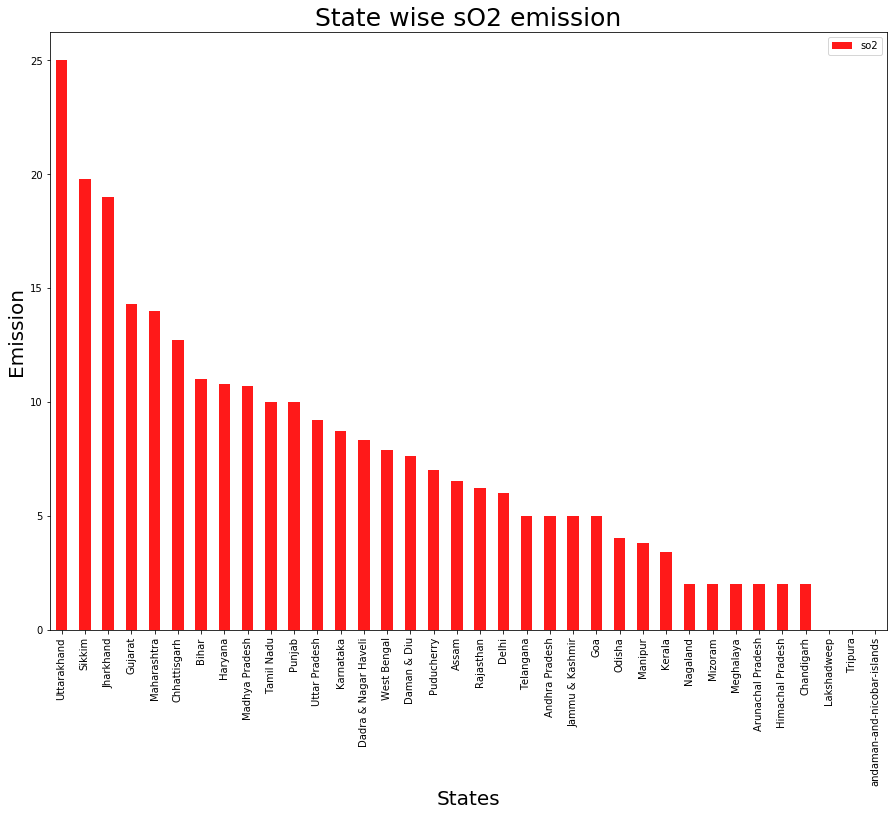

In [16]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).plot.bar(color='r',alpha=0.9,figsize=(15,11))
plt.title("State wise sO2 emission",fontsize=25)
plt.ylabel('Emission',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Emission')
plt.show()

**Observation from above graph**

* From the above figure, we see that so2 level is highest in Uttarakhand and lowest in Chandigarh.

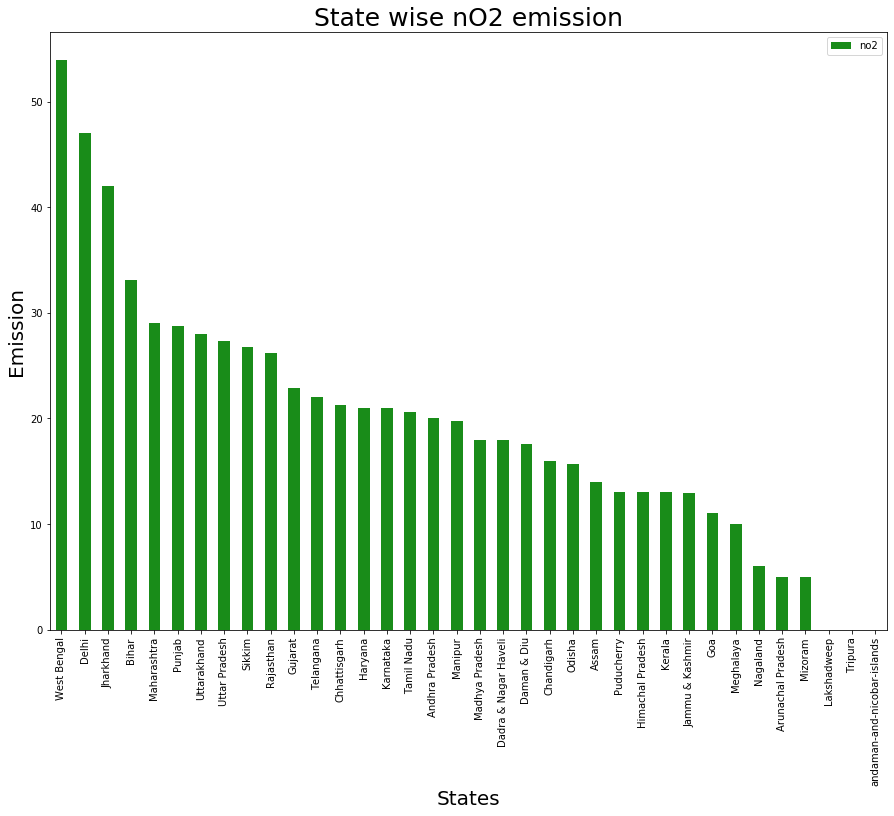

In [17]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).plot.bar(color='g',alpha=0.9,figsize=(15,11))
plt.title("State wise nO2 emission",fontsize=25)
plt.ylabel('Emission',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.show()

**Observation from above graph**

* It is clear from the figure that West Bengal has the maximum level of no2, whereas Nagaland has the least.
* Delhi is ‘ranked’ second, followed by Jharkhand.
* It is not surprising as Delhi hit the headlines a couple of times over the past few years, regarding air pollution and specifically no2 concentrations.

**RSPM **

*RSPM is that fraction of TSPM which is readily inhaled by humans through their respiratory system and in general, considered as particulate matter with their diameter less than 2.5 micrometers.Larger particles would be filtered in the nasal duct.

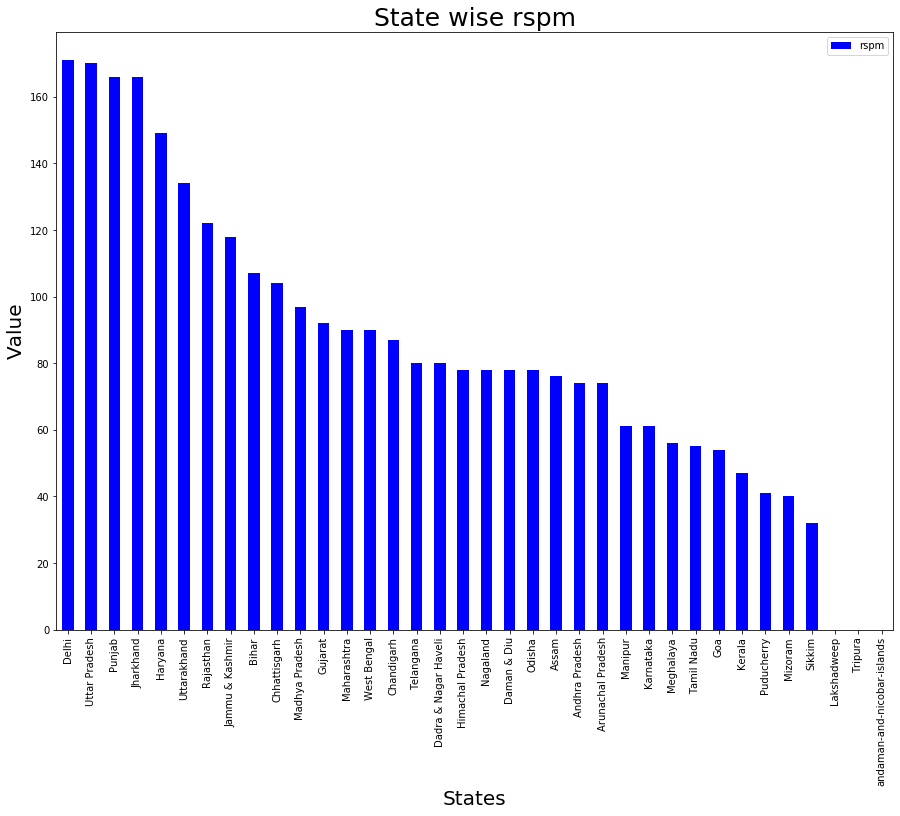

In [18]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).plot.bar(color='b',figsize=(15,11))
plt.title("State wise rspm",fontsize=25)
plt.ylabel('Value',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.show()

**SPM**

* Suspended Particulate Matter (SPM) are microscopic solid or liquid matter suspended in Earth's atmosphere. The term aerosol commonly refers to the particulate/air mixture, as opposed to the particulate matter alone.[3] Sources of particulate matter can be natural or anthropogenic. 
* They have impacts on climate and precipitation that adversely affect human health.


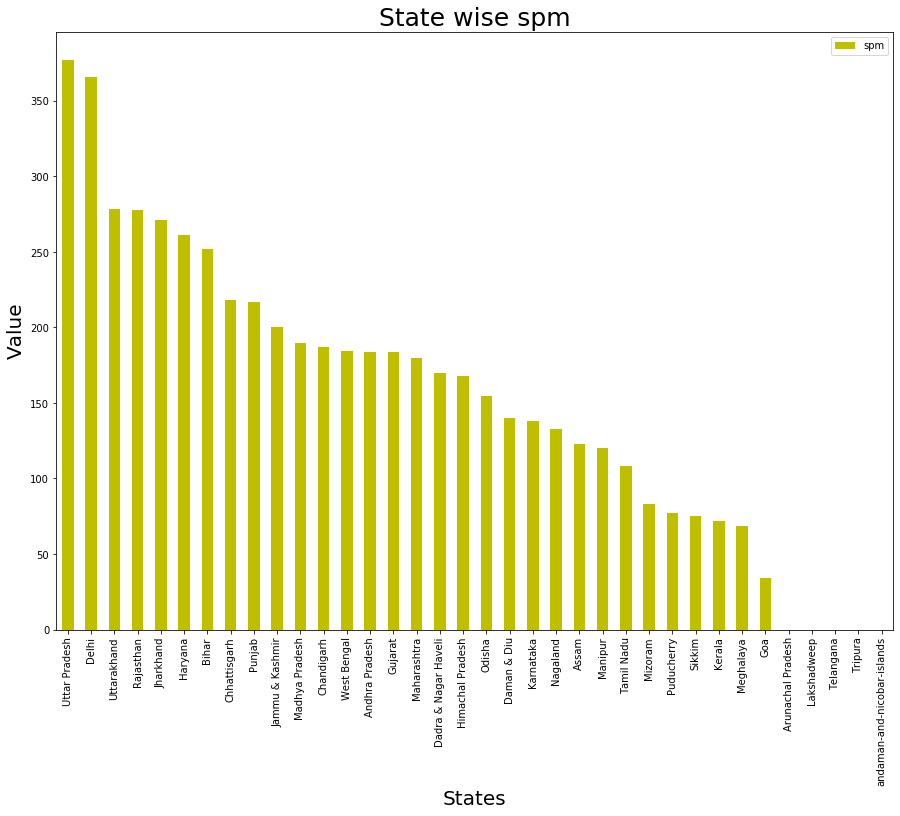

In [19]:
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).plot.bar(color='y',figsize=(15,11))
plt.title("State wise spm",fontsize=25)
plt.ylabel('Value',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.show()

**Observation from above graph**

* We can see that Uttar Pradesh and Delhi pair again tops the list. 
* UP and Delhi have a comparable concentration of spm and rspm.

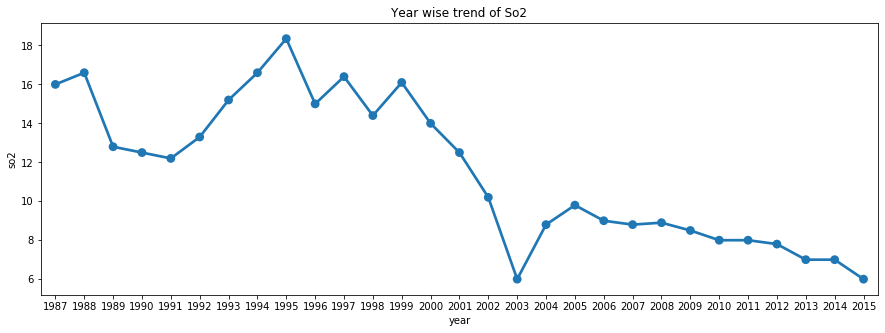

In [26]:

data['date'] = pd.to_datetime(data['date'],format='%d-%m-%y') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)

f,ax=plt.subplots(figsize=(15,5))
plt.title("Year wise trend of So2")
_=sns.pointplot(x='year', y='so2', data=df)

**Observation from above graph**

* We can see that sulphur dioxide (SO2) emissions in India decreased in 2010 as compared to 2001 level.
* The Air (Prevention and Control of Pollution) Act was introduced in 1981 and was amended in 1987.The implementation showed results and the level of so2 decreased.
* We can also observed that data released by NASA’s Aura satellite calls into question the veracity of Central Pollution Control Board’s (CPCB) claim made in 2012 that the mean sulphur dioxide (SO2) emissions in India decreased in 2010 as compared to 2001 level.

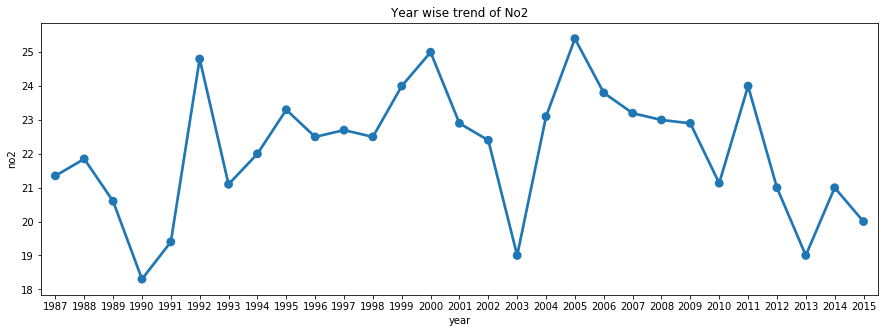

In [27]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
plt.title("Year wise trend of No2")
_=sns.pointplot(x='year', y='no2', data=df)


****FINAL CONCLUSION****

* Mainly Northern states have high air pollution.
* South and North East states have less air pollution.
* Uttarakhand, Sikkim, Jharkhand, Gujarat, Maharashtra, Chattisgarh — the government should take action against the growing so2 concentration in these states.
* States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted.

Defination and data is taken from medium.com and kaggle respectively.